# Скользящие режимы управления (пример)
---
## Степанов Никита

С изложенным материалом можно ознакомиться в оригинальной статье: http://sisdin.unipv.it/labsisdin/teaching/courses/ails/files/Sliding_Mode_Control_Handout.pdf

## Основные понятия
Рассмотрим систему управления, описываемую уравнением:
$$\dot x(t) = f(x(t),\; u(t),\; t)$$

где $x(t_0) = x_0$ и $t,\; t_0 \in [0, +\infty)$
* $x(t) \in \mathbb{R}^n$ - **вектор состояния системы**
* $u(t) \in \mathbb{R}^m$ - **вектор управления**

Рассмотрим функцию состояния системы $\sigma(x(t)) \in \mathbb{R}^m$ и связанное с ней многообразие $\sigma(x(t)) = 0\in \mathbb{R}^m$
* $\sigma(x(t))$ - **скользящая переменная**
* $\sigma(x(t)) = 0$ - **скользящее многообразие**
---
## Основная идея
* **Скользящее многообразие** - это подпространство пространства состояния системы. Оно имеет размерность $n-m$.
* Оно может быть задано как одной поверхностью, так и пересечением нескольких поверхностей.
* Если траектория постоянно пересекает **скользящее многообразие**, то **скользящий режим** достигается, так как движение направлено в его сторону.
---
## Принципы проектирования
Неообходимо придумать два элемента:
* **Скользящее многообразие**: выбирается таким, чтобы система в скользящем режиме развивалась требуемым образом (т.е. она становилась линеаризованной или асимптотически сходилась к нулю, или удовлетворяла некоторому требованию, или др.).
* **Закон управления**: должен быть выбран так, чтобы запустился скользящий режим.

Важное требование к проектированию:
 - Скользящий режим должен достигаться за ***конечное*** время!

## Пример
Рассмотрим систему второго порядка:
$$\begin{bmatrix}
\dot x_1 \\
\dot x_2
\end{bmatrix} = 
\begin{bmatrix}
0 & 1 \\
    1 & 2
\end{bmatrix}
\cdot
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix} + 
\begin{bmatrix}
0 \\
1
\end{bmatrix} u$$

**Управление** выберем так: $u_1=-3x_1$ или $u_2 = 2x_1$. 

Построим фазовые траектории для двух случаев.



In [5]:
# Подключаем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [6]:
# Напишем интегратор. Воспользуемся методом Эйлера.
def solve_for_u1_u2(t0, t1, x1_0, x2_0, u):
    N = 100000 # Число шагов интегрирования
    
    delta_t = (t1 - t0) / N
    # Массивы для хранения координат x1 и x2
    X1 = [0 for i in range (0, N)]
    X2 = [0 for i in range (0, N)]
    # Начальная координата
    X1[0] = x1_0
    X2[0] = x2_0
    
    for i in range(1, N):
        V_x1 = X2[i-1] 
        V_x2 = X1[i-1] + 2*X2[i-1] + u*X1[i-1]
        
        X1[i] = X1[i-1] + V_x1*delta_t
        X2[i] = X2[i-1] + V_x2*delta_t
        
    return [X1, X2]

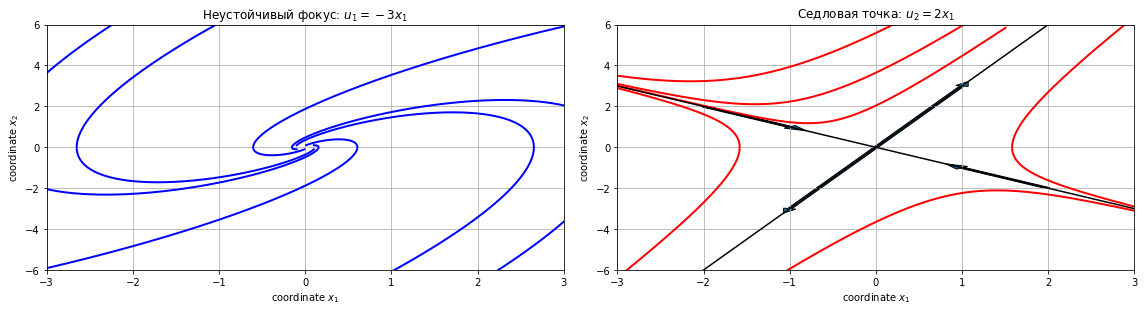

In [7]:
# Строим фазовые траектории для u1
u1_res = solve_for_u1_u2(0, 5, 0.1, 0.1, -3)
u1_res1 = solve_for_u1_u2(0, 5, 0.1, -0.1, -3)
u1_res2 = solve_for_u1_u2(0, 5, -0.1, 0.1, -3)
u1_res3 = solve_for_u1_u2(0, 5, -0.1, -0.1, -3)
u1_res4 = solve_for_u1_u2(0, 5, 0.01, 0.1, -3)
u1_res5 = solve_for_u1_u2(0, 5, -0.01, -0.1, -3)

fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(u1_res[0], u1_res[1], linewidth=2, color="blue")
ax1.plot(u1_res1[0], u1_res1[1], linewidth=2, color="blue")
ax1.plot(u1_res2[0], u1_res2[1], linewidth=2, color="blue")
ax1.plot(u1_res3[0], u1_res3[1], linewidth=2, color="blue")
ax1.plot(u1_res4[0], u1_res4[1], linewidth=2, color="blue")
ax1.plot(u1_res5[0], u1_res5[1], linewidth=2, color="blue")

ax1.set_title("Неустойчивый фокус: $u_1 = -3x_1$")
ax1.grid(True)
ax1.set(xlim=(-3, 3), ylim=(-6, 6))
ax1.set_xlabel("coordinate $x_1$")
ax1.set_ylabel("coordinate $x_2$")

# Строим фазовые траектории для u2
u2_res1 = solve_for_u1_u2(0, 2, -3, 3.1, 2)
u2_res11 = solve_for_u1_u2(0, 2, -3, 3.5, 2)
u2_res12 = solve_for_u1_u2(0, 2.2, -3, 3.01, 2)
u2_res2 = solve_for_u1_u2(0, 2, -3, 2.9, 2)
u2_res3 = solve_for_u1_u2(0, 2, 3, -3.1, 2)
u2_res4 = solve_for_u1_u2(0, 2, 3, -2.9, 2)

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(u2_res1[0], u2_res1[1], linewidth=2, color="red")
ax2.plot(u2_res11[0], u2_res11[1], linewidth=2, color="red")
ax2.plot(u2_res12[0], u2_res12[1], linewidth=2, color="red")
ax2.plot(u2_res2[0], u2_res2[1], linewidth=2, color="red")
ax2.plot(u2_res3[0], u2_res3[1], linewidth=2, color="red")
ax2.plot(u2_res4[0], u2_res4[1], linewidth=2, color="red")

ax2.set_title("Седловая точка: $u_2 = 2x_1$")
ax2.grid(True)
ax2.set(xlim=(-3, 3), ylim=(-6, 6))
ax2.set_xlabel("coordinate $x_1$")
ax2.set_ylabel("coordinate $x_2$")

ax2.axline((0, 0), (1, 3), color="black" )
ax2.axline((0, 0), (1, -1), color="black" )

ax2.arrow(0, 0, 1, 3, width=0.05)
ax2.arrow(0, 0, -1, -3, width=0.05)
ax2.arrow(2, -2, -1, 1, width=0.06)
ax2.arrow(-2, 2, 1, -1, width=0.06)
plt.tight_layout()

# Начальные точки в обоих случаях вибираются с целью сделать графики более репрезентативными

Мы получили неустойчивый фокус для $u_1 = -3x_1$ и седло для $u_2 = 2x_1$. 

Теперь возъмём **скользящее многообразие**: $\sigma = c_1 x_1 + x_2 = 0, \;c_1 > 0$, и подберем управление, как комбинацию двух предыдущих законов управления:
$$u = k(\sigma, x_1)\cdot x_1, \; k(\sigma, x_1) = \left\{
  \begin{array}{ccc}
     -3 &\sigma x_1 > 0 \\
     2 &\sigma x_1 < 0 \\
  \end{array}
\right.$$
---
Комбинация двух законов управления (которые по отдельности не стабилизирует систему) обеспечивает сходимость системы к началу координат.

**Начало координат становится асимптотически устойчивым положением равновесия системы.**

* Замечание: скользящий режим запускается, только если $c_1$ < 1.
---
Реализуем описанный выше закон управления. Построим фазовые траектории при таком законе.

In [8]:
# Пусть:
c1 = 0.5

def k(x1, x2):
    if c1*x1*x1 +x1*x2 > 0:
        return -3
    else:
        return 2

# Интегратор
def solve_for_u(t0, t1, x1, x2):
    N = 100000
    delta_t = (t1 - t0) / N
    X1 = [0 for i in range (0, N)]
    X2 = [0 for i in range (0, N)]
    X1[0] = x1
    X2[0] = x2
    
    for i in range(1, N):
        V_x1 = X2[i-1] 
        V_x2 = X1[i-1] + 2*X2[i-1] + k(X1[i-1], X2[i-1])*X1[i-1]
        
        X1[i] = X1[i-1] + V_x1*delta_t
        X2[i] = X2[i-1] + V_x2*delta_t
    return [X1, X2]

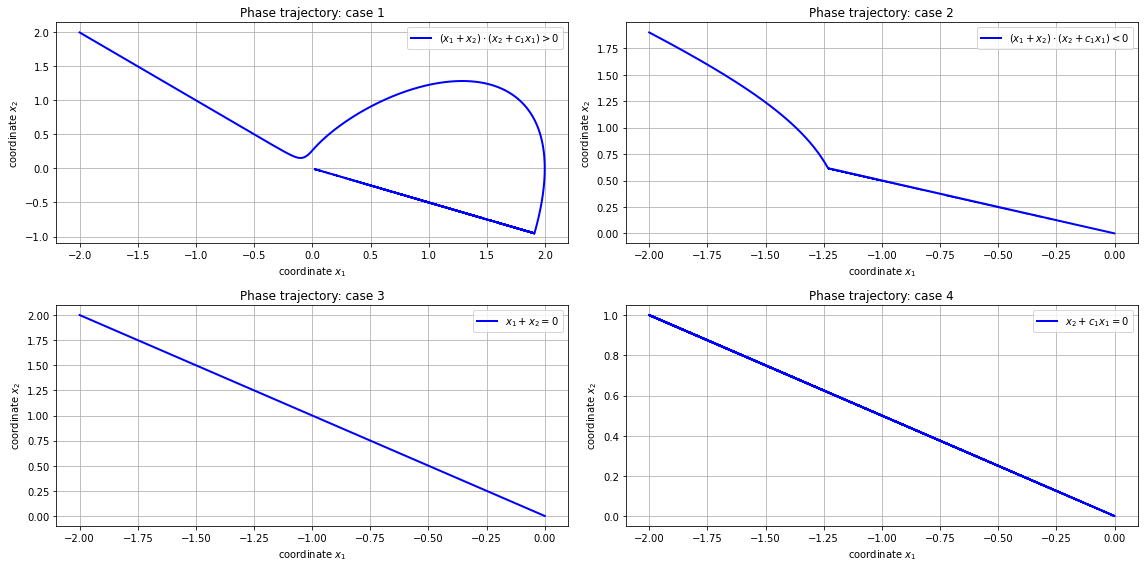

In [9]:
# Построим отдельно несколько фаховых траекторий для разных начальных точек.

t0 = 0
t1 = 15
sliding_mode_res1 = solve_for_u(t0, t1, -2, 2.00001)
sliding_mode_res2 = solve_for_u(t0, t1, -2, 1.9)
sliding_mode_res3 = solve_for_u(t0, t1, -2, 2)
sliding_mode_res4 = solve_for_u(t0, t1, -2, 2 * c1)

fig = plt.figure(figsize = (16, 8))

ax1 = fig.add_subplot(2, 2, 1)
ax1.grid(True)
ax1.set_title("Phase trajectory: case 1")
ax1.plot(sliding_mode_res1[0], sliding_mode_res1[1], linewidth=2, color="blue", label="$(x_1+x_2)\cdot(x_2+c_1 x_1) > 0$")
ax1.set_ylabel("coordinate $x_2$")
ax1.set_xlabel("coordinate $x_1$")
ax1.legend()

ax2 = fig.add_subplot(2, 2, 2)
ax2.grid(True)
ax2.set_title("Phase trajectory: case 2")
ax2.plot(sliding_mode_res2[0], sliding_mode_res2[1], linewidth=2, color="blue", label="$(x_1+x_2)\cdot(x_2+c_1 x_1) < 0$")
ax2.set_ylabel("coordinate $x_2$")
ax2.set_xlabel("coordinate $x_1$")
ax2.legend()

ax3 = fig.add_subplot(2, 2, 3)
ax3.grid(True)
ax3.set_title("Phase trajectory: case 3")
ax3.plot(sliding_mode_res3[0], sliding_mode_res3[1], linewidth=2, color="blue", label="$x_1 + x_2 = 0$")
ax3.set_ylabel("coordinate $x_2$")
ax3.set_xlabel("coordinate $x_1$")
ax3.legend()

ax4 = fig.add_subplot(2, 2, 4)
ax4.grid(True)
ax4.set_title("Phase trajectory: case 4")
ax4.plot(sliding_mode_res4[0], sliding_mode_res4[1], linewidth=2, color="blue", label="$x_2+c_1 x_1 = 0$")
ax4.set_ylabel("coordinate $x_2$")
ax4.set_xlabel("coordinate $x_1$")
ax4.legend()

plt.tight_layout()

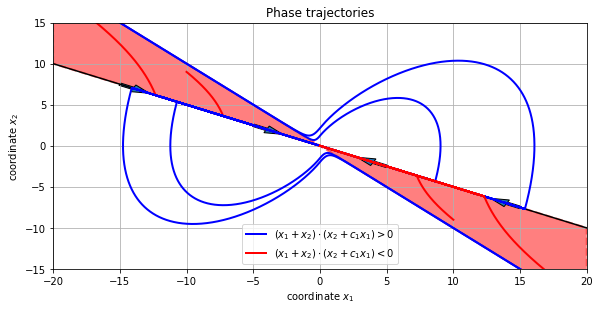

In [10]:
# Изобразим семейство фазовых траекторий на одном графике

t0 = 0
t1 = 15
sliding_mode_res1 = solve_for_u(t0, t1, -15, 15.00001)
sliding_mode_res2 = solve_for_u(t0, t1, -15, 15.0001)
sliding_mode_res3 = solve_for_u(t0, t1, 10, -9)
sliding_mode_res4 = solve_for_u(t0, t1, 20, -19)
sliding_mode_res5 = solve_for_u(t0, t1, 20, -20.00001)
sliding_mode_res6 = solve_for_u(t0, t1, 20, -20.00003)
sliding_mode_res7 = solve_for_u(t0, t1, -10, 9)
sliding_mode_res8 = solve_for_u(t0, t1, -20, 19)

fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(2, 2, 1)
ax1.grid(True)
ax1.set_title("Phase trajectories")
ax1.axline((0, 0), (1, -c1), color="black" )

ax1.plot(sliding_mode_res1[0], sliding_mode_res1[1], linewidth=2, color='blue', label="$(x_1+x_2)\cdot(x_2+c_1 x_1) > 0$")
ax1.plot(sliding_mode_res2[0], sliding_mode_res2[1], linewidth=2, color='blue')
ax1.plot(sliding_mode_res3[0], sliding_mode_res3[1], linewidth=2, color='red', label="$(x_1+x_2)\cdot(x_2+c_1 x_1) < 0$")
ax1.plot(sliding_mode_res4[0], sliding_mode_res4[1], linewidth=2, color='red')
ax1.plot(sliding_mode_res7[0], sliding_mode_res7[1], linewidth=2, color='red')
ax1.plot(sliding_mode_res8[0], sliding_mode_res8[1], linewidth=2, color='red')
ax1.plot(sliding_mode_res5[0], sliding_mode_res5[1], linewidth=2, color='blue')
ax1.plot(sliding_mode_res6[0], sliding_mode_res6[1], linewidth=2, color='blue')

x = np.linspace(-20, 20, 100)
ax1.fill_between(x, -x, -c1*x,
                facecolor='r',
                alpha = 0.5,
                color = 'red',    #  цвет линий
                linewidth = 2,      #  ширина линий
                linestyle = '--')   #  начертание линий

ax1.set_ylabel("coordinate $x_2$")
ax1.set_xlabel("coordinate $x_1$")
ax1.set(xlim=(-20, 20), ylim=(-15, 15))

# Наносим на график стрелочки
ax1.arrow(15, -15*c1, -1, 1*c1, width=0.3)
ax1.arrow(5, -5*c1, -1, 1*c1, width=0.3)
ax1.arrow(-15, 15*c1, 1, -1*c1, width=0.3)
ax1.arrow(-5, 5*c1, 1, -1*c1, width=0.3)
ax1.legend()

plt.tight_layout()